## [개념정리]
### 앙상블
여러개의 분류기를 생성하고 예측을 결합하여 정확한 최정 예측을 도축하는 기법
대표적인 알고리즘 : 랜덤포레스트 & 그래디언트 부스팅 알고리즘 

#### 앙상블 학습의 유형
* 보팅: 여러개의 분류기가 투표를 통해 최종 예측 결과를 결정, 서로 다른 알고리즘을 가진 분류기
    * VotingClassifier(estimators ,voting)
  1) 하드포빙 : 다수결 원칙
  2) 소프트 보팅 : 레이블 값 결정 확률의 평균 -> 확률이 높은 레이블 값=최종보팅 결과값
* 배깅: 여러개의 분류기가 투표를 통해 최종 예측 결과를 결정, 동일한 알고리즘을 가진 분류기 -> 중첩 허용
  1) 부스트래핑 분할 방식(개별 classifier에게 데이터 샘플리을 추출하는 방식)
  2) 부스트래핑 방식으로 샘플링된 데이터 세트에 대해서 학습을 통해 개별적인 예측을 수행한 결과를 보팅을 통해서 최종 예측 결과 선정
* 부스팅 :가중치를 부여하면서 학습과 예측을 진행

### 랜덤포레스트
(배깅: 같은 알고리즘으로 여러개의 분류기를 만들어서 보팅으로 최종 결정하는 알고리즘)

랜덤포레스트 : 기반 알고리즘은 결정트리, 여러개의 트리 분류기가 전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링해 개별적으로 학습한 후 최종적으로 모든 분류기가 보팅을 통해 예측 결정을 하게 됨.

- 부스트래핑 분할 방식: 여러개의 데이터 세트를 중첩하게 분리

- 서브세트 : 부스트래핑으로 데이터가 임의로 만들어진 데이터
- RandomForestClassifier

- 하이퍼 파라미터: n_estimators(결정트리의 개수 결정), max_features

### GBM
부스팅 알고리즘 : 여러개의 약한 학습기를 순차적으로 학습-예측 -> 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습
1) AdaBoost
2) GBM : 가중치 업데이틑 경사하강법 이용(오류식을 최소화하는 방향성을 가지고 반복적으로 가중치 값을 업데이트하는 것)
* GradientBoostingClassifier
* GBM이 랜덤 포레스트보다는 예측성능이 조금 뛰어난 경우가 많음
* 순차적인 예측 오류 보정을 통해 학습 수행 -> 병렬처리 지원 X -> 대용량 데이터의 경우 시간이 많이 필요함
  but, random forest : 상대적으로 빠른 수행시간을 보장-> 예측 결과를 쉽게 도출
* 하이퍼 파라미터 : loss(비용함수), learning_rate('GBM 학습을 진행할때마다 적용한 학습률', le
* learning_rate과 n_estimators는 상호 보완적), n_estimator(week learner의 개수), subsample(week learner가 학습에 사용한는 데이터의 샘플링 비율)

### XGBoost
GBM을 기반으로 하고 있지만, GBM보다 빠르게 학습을 완료할 수 있음

과접합 규제, tree pruning으로 더이상 긍정 이득이 없는 분할을 가지치기해서 분할수를 더 줄이는 추가적인 장점을 가지고 있음.

초기 XGBoost는 사이킷런의 fit, predict() 메서드를 적용될수 (x), cross_val_score, GridSearchCV와 함께 사용 X

XGBClassifier & XGBRegressor이용

사이킷런 래퍼 XGBoost 모듈 vs. 파이썬 네트워크 XGBoost (고유의 API와 하이퍼 파라미터를 이용)

#### 파이썬 래퍼 XGBoost 하이퍼 파라미터
- GBM과 유사한 하이퍼 파라미터 + earlystopping, 과접합을 규제하기 위한 하이퍼파라미터 추가
- 1) 일반 파라미터
     booster, silent, nthread
  2) 부스터 파라미터 : 트리 최적화, 부스팅, regulation
     eta, num_boost_rounds,sub_sample
  3) 학습 테스크 파라미터 : 객체 함수, 평가를 위한 지표
     eval_metrics: 회귀 rmse 분류 error
if 과접합 심각-> eta값을 낮춤/ max_depth값을 낮춤/ min_child_weight값을 낮춤, gamma를 높임

-XGBoost만의 전용 데이터 객체인 DMatrix를 사용함 -> data, label인자

-하이퍼 파라미터를 xgboost 모듈의 train()함수에 파라미터로 전달

-학습 반복시마다 검증 데이터 세트를 이용해 성능을 평가할 수 있는 기능을 제공함

-조기 중단 :eary_stopping_rounds 파라미터에 입력하여 사용

-xgboost의 predict() : 예측결과값이 아닌 예측결과를 추정할 수 있는 확률값을 반환

#### 사이킷런 래퍼 XGBoost의 개요 및 적용
-fit()과 predict()만으로 학습과 예측 가능 + 사이킷런의 다른 유틸리티를 그대로 사용할 수 있음

-XGBClassifier & XGBRegressor

-learning_rate, subsample, reg_lambda, reg_alpha

-조기중단 관련된 피처를 fit()에 입력 

-early_stopping_rounds(반복횟수), eval_metrics(조기중단 평가지표), eval_set(수행할 데이터 세트)

____
____
## [코드 필사]

In [1]:
import pandas as pd
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer=load_breast_cancer()

data_df=pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [2]:
#개별 모델은 로지스틱 회귀와 KNN임.
lr_clf=LogisticRegression(solver='liblinear')
knn_clf=KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf=VotingClassifier(estimators=[('LR',lr_clf),('KNN', knn_clf)], voting='soft')

X_train,X_test,y_train,y_test=train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=156)

#VotingClassifier 학습/예측/평가
vo_clf.fit(X_train, y_train)
pred=vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

#개별 모델의 학습/예측/평가
classifiers=[lr_clf,knn_clf]
for classifier in classifiers:
    classifier.fit(X_train,y_train)
    pred=classifier.predict(X_test)
    class_name=classifier.__class__.__name__
    print('{0} 분류기 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))

Voting 분류기 정확도: 0.9561
LogisticRegression 분류기 정확도: 0.9474
KNeighborsClassifier 분류기 정확도: 0.9386


### 랜덤포레스트
(배깅: 같은 알고리즘으로 여러개의 분류기를 만들어서 보팅으로 최종 결정하는 알고리즘)

랜덤포레스트 : 기반 알고리즘은 결정트리, 여러개의 트리 분류기가 전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링해 개별적으로 학습한 후 최종적으로 모든 분류기가 보팅을 통해 예측 결정을 하게 됨.

- 부스트래핑 분할 방식: 여러개의 데이터 세트를 중첩하게 분리

- 서브세트 : 부스트래핑으로 데이터가 임의로 만들어진 데이터
- RandomForestClassifier

- 하이퍼 파라미터: n_estimators(결정트리의 개수 결정), max_features

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df=pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df=feature_dup_df.reset_index()
    new_feature_name_df=pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name']=new_feature_name_df[['column_name','dup_cnt']].apply(lambda x: x[0]+'_'+str(x[1]) if x[1]>0 else x[0], axis=1)
    new_feature_name_df=new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

def get_human_dataset():
    # 각 데이터 파일은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 함당.
    feature_name_df = pd.read_csv('./data/human_activity_features.txt', sep='\s+',
                                  header=None, names=['column_index', 'column_name'])

    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame 생성.
    new_feature_name_df = get_new_feature_name_df(feature_name_df)

    # DataFrame에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()

    # 학습 피처 데이터세트와 테스트 피처 데이터를 DataFrame으로 로딩. 칼럼명은 feature_name 적용
    X_train = pd.read_csv('./data/human_activity_X_train.txt', sep='\s+', names=feature_name)
    X_test = pd.read_csv('./data/human_activity_X_test.txt', sep='\s+', names=feature_name)

    # 학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩하고 칼럼명은 action으로 부여
    y_train = pd.read_csv('./data/human_activity_y_train.txt', sep='\s+', header=None, names=['action'])
    y_test = pd.read_csv('./data/human_activity_y_test.txt', sep='\s+', header=None, names=['action'])

    # 로드된 학습/테스트용 DataFrame을 모두 반환
    return X_train, X_test, y_train, y_test

#결정 트리에서 사용한 get_human_dataset()을 이용해 학습/테스트용 DataFrame으로 반환
X_train,X_test,y_train,y_test=get_human_dataset()

#랜덤포레스트 학습 및 별도의 테스트 세트로 예측 성능 평가
rf_clf=RandomForestClassifier(random_state=0, max_depth=8)
rf_clf.fit(X_train,y_train)
pred=rf_clf.predict(X_test)
accuracy=accuracy_score(y_test,pred)
print('랜덤포레스트 정확도:{0:.4f}'.format(accuracy))

랜덤포레스트 정확도:0.9220


In [14]:
y_train.values.ravel().shape

(7352,)

In [15]:
y_train=y_train.values.ravel()
y_test=y_test.values.ravel()

#y에는 1차원 배열이 들어가야 하므로

from sklearn.model_selection import GridSearchCV

params={
    'max_depth':[8,16,24],
    'min_samples_leaf':[1,6,12],
    'min_samples_split':[2,8,16]
}

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf=RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
grid_cv=GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최고 하이퍼 파라미터:\n',grid_cv.best_params_)
print('최고 예측 정확도:{0:.4f}'.format(grid_cv.best_score_))

최고 하이퍼 파라미터:
 {'max_depth': 16, 'min_samples_leaf': 6, 'min_samples_split': 16}
최고 예측 정확도:0.9157


In [16]:
rf_clf1=RandomForestClassifier(n_estimators=100, min_samples_leaf=6, max_depth=16, min_samples_split=2, random_state=0)
rf_clf1.fit(X_train, y_train)
pred=rf_clf1.predict(X_test)
print('예측 정확도:{0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도:0.9253


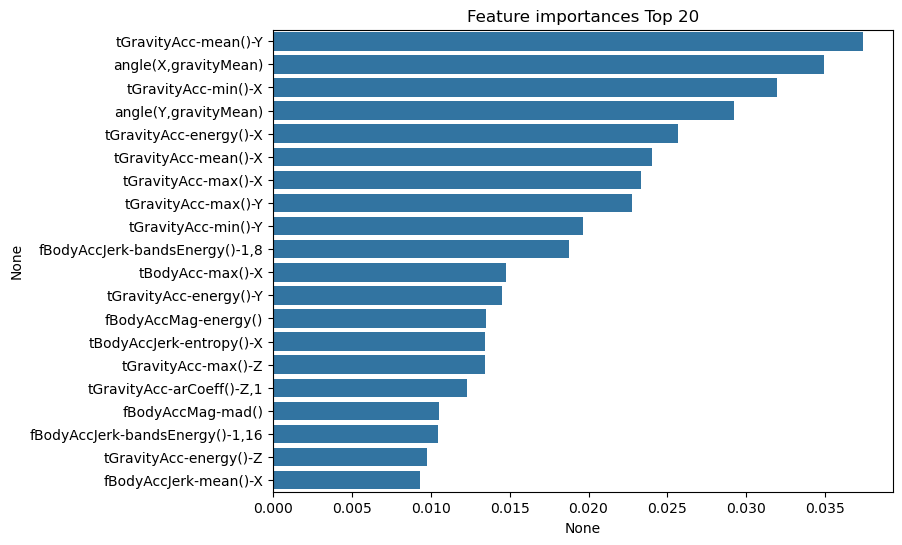

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values=rf_clf1.feature_importances_
ftr_importances=pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20=ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

### GBM
부스팅 알고리즘 : 여러개의 약한 학습기를 순차적으로 학습-예측 -> 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습
1) AdaBoost
2) GBM : 가중치 업데이틑 경사하강법 이용(오류식을 최소화하는 방향성을 가지고 반복적으로 가중치 값을 업데이트하는 것)
* GradientBoostingClassifier
* GBM이 랜덤 포레스트보다는 예측성능이 조금 뛰어난 경우가 많음
* 순차적인 예측 오류 보정을 통해 학습 수행 -> 병렬처리 지원 X -> 대용량 데이터의 경우 시간이 많이 필요함
  but, random forest : 상대적으로 빠른 수행시간을 보장-> 예측 결과를 쉽게 도출
* 하이퍼 파라미터 : loss(비용함수), learning_rate('GBM 학습을 진행할때마다 적용한 학습률', le
* learning_rate과 n_estimators는 상호 보완적), n_estimator(week learner의 개수), subsample(week learner가 학습에 사용한는 데이터의 샘플링 비율)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train,X_test,y_train,y_test=get_human_dataset()

#GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time=time.time()
gb_clf=GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train,y_train)
gb_pred=gb_clf.predict(X_test)
gb_accuracy=accuracy_score(y_test,gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print('GBM 수행시간: {0:.4f}'.format(time.time()-start_time))

### XGBoost
GBM을 기반으로 하고 있지만, GBM보다 빠르게 학습을 완료할 수 있음

과접합 규제, tree pruning으로 더이상 긍정 이득이 없는 분할을 가지치기해서 분할수를 더 줄이는 추가적인 장점을 가지고 있음.

초기 XGBoost는 사이킷런의 fit, predict() 메서드를 적용될수 (x), cross_val_score, GridSearchCV와 함께 사용 X

XGBClassifier & XGBRegressor이용

사이킷런 래퍼 XGBoost 모듈 vs. 파이썬 네트워크 XGBoost (고유의 API와 하이퍼 파라미터를 이용)


In [1]:
#! pip install xgboost=1.5.0
# 이미 설치해서 주석처리함

In [2]:
import xgboost as xgb
from xgboost import XGBClassifier

#### 파이썬 래퍼 XGBoost 하이퍼 파라미터
- GBM과 유사한 하이퍼 파라미터 + earlystopping, 과접합을 규제하기 위한 하이퍼파라미터 추가
- 1) 일반 파라미터
     booster, silent, nthread
  2) 부스터 파라미터 : 트리 최적화, 부스팅, regulation
     eta, num_boost_rounds,sub_sample
  3) 학습 테스크 파라미터 : 객체 함수, 평가를 위한 지표
     eval_metrics: 회귀 rmse 분류 error
if 과접합 심각-> eta값을 낮춤/ max_depth값을 낮춤/ min_child_weight값을 낮춤, gamma를 높임

-XGBoost만의 전용 데이터 객체인 DMatrix를 사용함 -> data, label인자

-하이퍼 파라미터를 xgboost 모듈의 train()함수에 파라미터로 전달

-학습 반복시마다 검증 데이터 세트를 이용해 성능을 평가할 수 있는 기능을 제공함

-조기 중단 :eary_stopping_rounds 파라미터에 입력하여 사용

-xgboost의 predict() : 예측결과값이 아닌 예측결과를 추정할 수 있는 확률값을 반환

In [3]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset=load_breast_cancer()
features=dataset.data
labels=dataset.target
cancer_df=pd.DataFrame(data=features, columns=dataset.feature_names)
cancer_df['target']=labels
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [4]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
target
1    357
0    212
Name: count, dtype: int64


In [5]:
#cancer_df에서 feature용 DataFrame과 Label용 Series 객체 추출
#맨 마지막 칼럼이 Label임. Feature 용 DataFrame은 cancer_df의 첫번째 칼럼에서 맨 마지막 두번째 칼럼까지를 :-1 슬라이싱으로 추출.
X_features=cancer_df.iloc[:,:-1]
y_label=cancer_df.iloc[:,-1]

In [6]:
# 전체 데이터 중에 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train,X_test,y_train,y_test=train_test_split(X_features,y_label, test_size=0.2, random_state=156)

#위에서 만든 X_train,y_train을 다시 쪼개서 90%는 학습과 10%는 검증용 데이터로 분리
X_tr,X_val,y_tr,y_val=train_test_split(X_train,y_train, test_size=0.1, random_state=156)

print(X_train.shape, X_test.shape)
print(X_tr.shape, X_val.shape)

(455, 30) (114, 30)
(409, 30) (46, 30)


In [7]:
#만약 구버전 XGBoost에서 DataFrame으로 Dmatrix 생성이 안될 경우 X_train.values로 넘파이 변환
# 학습, 검증, 테스트용 Dmatrix 생성
dtr=xgb.DMatrix(data=X_tr, label=y_tr)
dval=xgb.DMatrix(data=X_val, label=y_val)
dtest=xgb.DMatrix(data=X_test, label=y_test)

In [8]:
params={'max_depth':3,
        'eta':0.5,
        'objective':'binary:logistic',
        'eval_metric': 'logloss'
}
num_rounds=400

In [9]:
#학습 데이터 셋은 'train' 또는 평가 데이터 셋은 'eval'로 명기합니다.
eval_list=[(dtr,'train'),(dval,'eval')] #또는 eval_lis=[(dval,'eval')]만 명기해도 무방

#하이퍼 파라미터와 early stopping 파라미터를 train()함수의 파라미터로 전달
xgb_model=xgb.train(params=params, dtrain=dtr, num_boost_round=num_rounds, early_stopping_rounds=50, evals=eval_list)

[0]	train-logloss:0.33682	eval-logloss:0.44605
[1]	train-logloss:0.20535	eval-logloss:0.35646
[2]	train-logloss:0.13651	eval-logloss:0.30729
[3]	train-logloss:0.09875	eval-logloss:0.27591
[4]	train-logloss:0.07350	eval-logloss:0.27413
[5]	train-logloss:0.05883	eval-logloss:0.27065
[6]	train-logloss:0.04774	eval-logloss:0.26874
[7]	train-logloss:0.03823	eval-logloss:0.26627
[8]	train-logloss:0.03193	eval-logloss:0.27051
[9]	train-logloss:0.02762	eval-logloss:0.27630
[10]	train-logloss:0.02325	eval-logloss:0.27360
[11]	train-logloss:0.02012	eval-logloss:0.26486
[12]	train-logloss:0.01792	eval-logloss:0.27231
[13]	train-logloss:0.01599	eval-logloss:0.26958
[14]	train-logloss:0.01457	eval-logloss:0.25916
[15]	train-logloss:0.01352	eval-logloss:0.26258
[16]	train-logloss:0.01250	eval-logloss:0.25959
[17]	train-logloss:0.01143	eval-logloss:0.26171
[18]	train-logloss:0.01087	eval-logloss:0.26166
[19]	train-logloss:0.01029	eval-logloss:0.26544
[20]	train-logloss:0.00978	eval-logloss:0.26265
[2

In [10]:
pred_probs=xgb_model.predict(dtest)
print('predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10],3))

#예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정하여 List 객체인 preds에 저장
preds=[1 if x>0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시:', preds[:10])

predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[0.979 0.005 0.748 0.004 0.995 1.    1.    1.    1.    0.   ]
예측값 10개만 표시: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,f1_score,roc_auc_score

def get_clf_eval(y_test, pred, pred_proba):
    confusion=confusion_matrix(y_test,pred)
    accuracy=accuracy_score(y_test, pred)
    precision=precision_score(y_test, pred)
    recall=recall_score(y_test,pred)
    f1=f1_score(y_test, pred)
    roc_auc=roc_auc_score(y_test,pred)
    print('오차행렬')
    print(confusion)
    print('정확도 :{0:.4f}, 정밀도 : {1:.4f}, 재현율:{2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy,precision,recall,f1,roc_auc))

          
get_clf_eval(y_test, preds, pred_probs)

오차행렬
[[34  3]
 [ 2 75]]
정확도 :0.9561, 정밀도 : 0.9615, 재현율:0.9740, F1:0.9677, AUC:0.9465


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

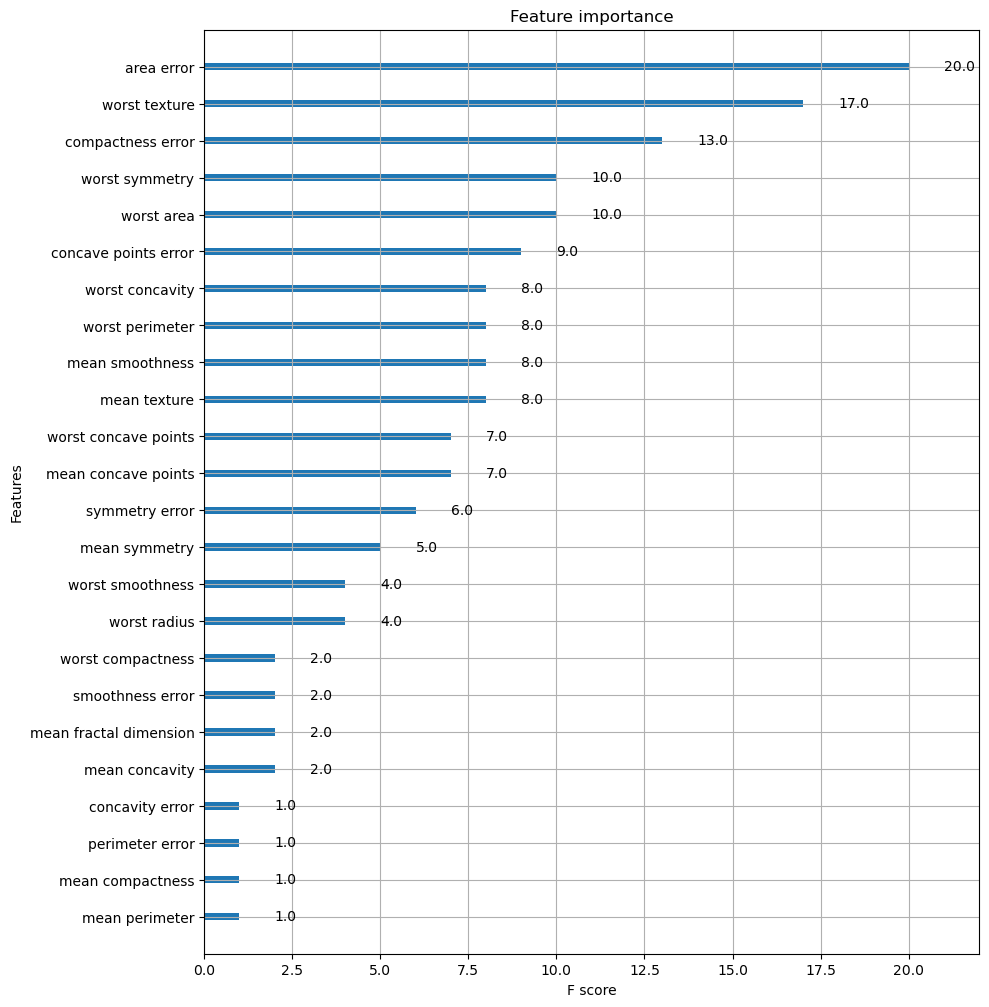

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax=plt.subplots(figsize=(10,12))
plot_importance(xgb_model, ax=ax)

#### 사이킷런 래퍼 XGBoost의 개요 및 적용
-fit()과 predict()만으로 학습과 예측 가능 + 사이킷런의 다른 유틸리티를 그대로 사용할 수 있음

-XGBClassifier & XGBRegressor

-learning_rate, subsample, reg_lambda, reg_alpha

-조기중단 관련된 피처를 fit()에 입력 

-early_stopping_rounds(반복횟수), eval_metrics(조기중단 평가지표), eval_set(수행할 데이터 세트)

In [13]:
#사이킷런 래퍼 XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

#Warning 메세지를 없애기 위해 eval_metric 값을 XGBClassifier 생성 인자로 입력.
xgb_wrapper=XGBClassifier(n_estimators=400, learning_rate=0.5, max_depth=3, eval_metric='logloss')
xgb_wrapper.fit(X_train, y_train, verbose=True)
w_preds=xgb_wrapper.predict(X_test)
w_preds_proba=xgb_wrapper.predict_proba(X_test)[:,1]

In [14]:
get_clf_eval(y_test,w_preds,w_preds_proba)

오차행렬
[[34  3]
 [ 2 75]]
정확도 :0.9561, 정밀도 : 0.9615, 재현율:0.9740, F1:0.9677, AUC:0.9465


In [17]:
from xgboost import XGBClassifier

xgb_wrapper=XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3, early_stopping_rounds=50, eval_metric='logloss')
evals=[(X_tr,y_tr),(X_val,y_val)]
xgb_wrapper.fit(X_tr,y_tr, verbose=True,eval_set=evals)

ws50_preds=xgb_wrapper.predict(X_test)
ws50_preds_proba=xgb_wrapper.predict_proba(X_test)[:,1]

[0]	validation_0-logloss:0.62480	validation_1-logloss:0.63104
[1]	validation_0-logloss:0.58674	validation_1-logloss:0.60478
[2]	validation_0-logloss:0.55226	validation_1-logloss:0.58223
[3]	validation_0-logloss:0.52086	validation_1-logloss:0.56184
[4]	validation_0-logloss:0.49192	validation_1-logloss:0.54118
[5]	validation_0-logloss:0.46537	validation_1-logloss:0.52223
[6]	validation_0-logloss:0.44029	validation_1-logloss:0.50287
[7]	validation_0-logloss:0.41666	validation_1-logloss:0.48620
[8]	validation_0-logloss:0.39525	validation_1-logloss:0.46974
[9]	validation_0-logloss:0.37542	validation_1-logloss:0.45497
[10]	validation_0-logloss:0.35701	validation_1-logloss:0.44131
[11]	validation_0-logloss:0.33982	validation_1-logloss:0.43134
[12]	validation_0-logloss:0.32297	validation_1-logloss:0.41972
[13]	validation_0-logloss:0.30725	validation_1-logloss:0.40902
[14]	validation_0-logloss:0.29327	validation_1-logloss:0.39883
[15]	validation_0-logloss:0.27946	validation_1-logloss:0.38968
[1

In [18]:
get_clf_eval(y_test, ws50_preds, ws50_preds_proba)

오차행렬
[[35  2]
 [ 2 75]]
정확도 :0.9649, 정밀도 : 0.9740, 재현율:0.9740, F1:0.9740, AUC:0.9600


In [22]:
#early_stopping_rounds를 10으로 설정하고 재학습
xgb_wrapper=XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3, early_stopping_rounds=10, eval_metric='logloss')
evals=[(X_tr,y_tr),(X_val,y_val)]
xgb_wrapper.fit(X_tr,y_tr, eval_set=evals, verbose=True)
ws10_preds=xgb_wrapper.predict(X_test)
ws10_preds_proba=xgb_wrapper.predict_proba(X_test)[:,1]
get_clf_eval(y_test, ws10_preds, ws10_preds_proba)

[0]	validation_0-logloss:0.62480	validation_1-logloss:0.63104
[1]	validation_0-logloss:0.58674	validation_1-logloss:0.60478
[2]	validation_0-logloss:0.55226	validation_1-logloss:0.58223
[3]	validation_0-logloss:0.52086	validation_1-logloss:0.56184
[4]	validation_0-logloss:0.49192	validation_1-logloss:0.54118
[5]	validation_0-logloss:0.46537	validation_1-logloss:0.52223
[6]	validation_0-logloss:0.44029	validation_1-logloss:0.50287
[7]	validation_0-logloss:0.41666	validation_1-logloss:0.48620
[8]	validation_0-logloss:0.39525	validation_1-logloss:0.46974
[9]	validation_0-logloss:0.37542	validation_1-logloss:0.45497
[10]	validation_0-logloss:0.35701	validation_1-logloss:0.44131
[11]	validation_0-logloss:0.33982	validation_1-logloss:0.43134
[12]	validation_0-logloss:0.32297	validation_1-logloss:0.41972
[13]	validation_0-logloss:0.30725	validation_1-logloss:0.40902
[14]	validation_0-logloss:0.29327	validation_1-logloss:0.39883
[15]	validation_0-logloss:0.27946	validation_1-logloss:0.38968
[1

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

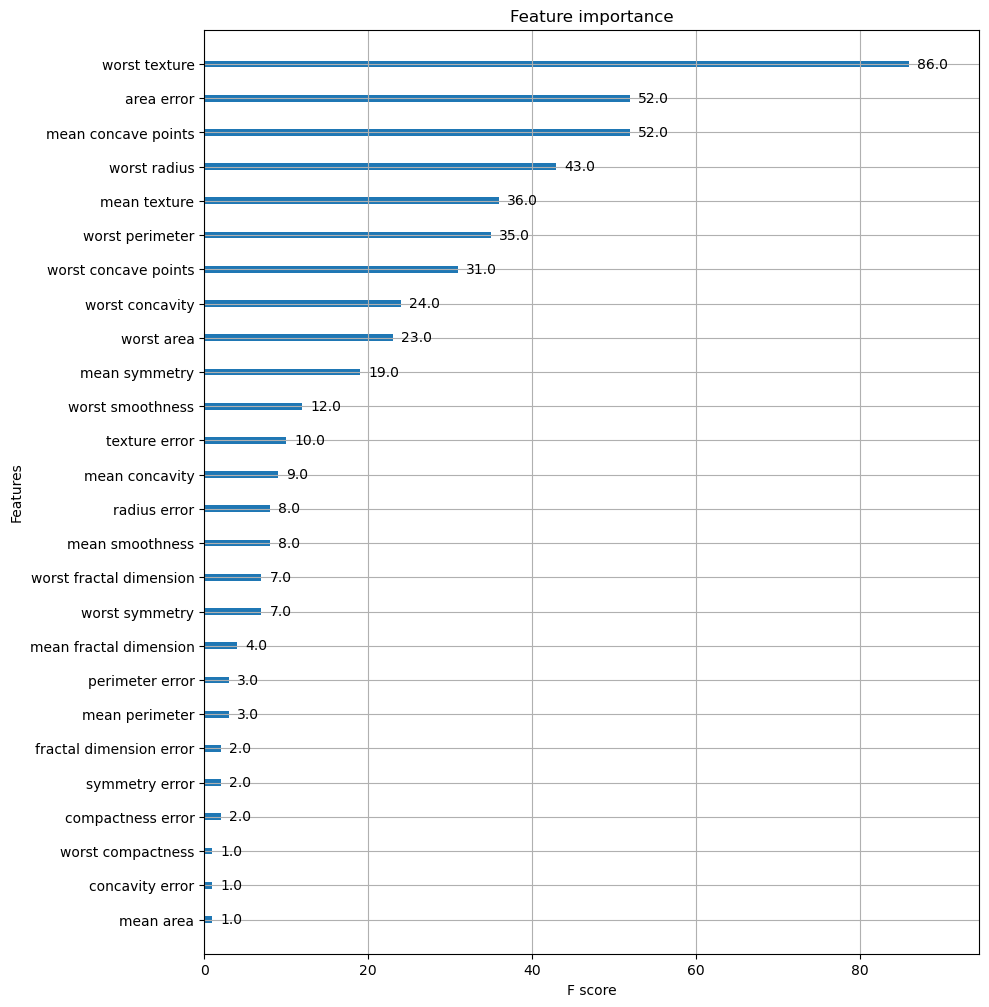

In [23]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax=plt.subplots(figsize=(10,12))
#사이킷런 래퍼 클래스를 입력해도 무방.
plot_importance(xgb_wrapper, ax=ax)